In [ ]:
# Knn-Assignment 1

In [16]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [17]:
# Import dataset
data=pd.read_csv('Zoo (1).csv')

In [18]:
data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [19]:
data.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [20]:
data.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [21]:
data=data.drop('animal name',axis=1)

In [22]:
data

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [23]:
pd.get_dummies(data['legs'])
data=pd.get_dummies(data,columns=['legs'])

In [24]:
data

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,...,tail,domestic,catsize,type,legs_0,legs_2,legs_4,legs_5,legs_6,legs_8
0,1,0,0,1,0,0,1,1,1,1,...,0,0,1,1,0,0,1,0,0,0
1,1,0,0,1,0,0,0,1,1,1,...,1,0,1,1,0,0,1,0,0,0
2,0,0,1,0,0,1,1,1,1,0,...,1,0,0,4,1,0,0,0,0,0
3,1,0,0,1,0,0,1,1,1,1,...,0,0,1,1,0,0,1,0,0,0
4,1,0,0,1,0,0,1,1,1,1,...,1,0,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,...,1,0,1,1,0,1,0,0,0,0
97,1,0,1,0,1,0,0,0,0,1,...,0,0,0,6,0,0,0,0,1,0
98,1,0,0,1,0,0,1,1,1,1,...,1,0,1,1,0,0,1,0,0,0
99,0,0,1,0,0,0,0,0,0,1,...,0,0,0,7,1,0,0,0,0,0


# **Visualization**


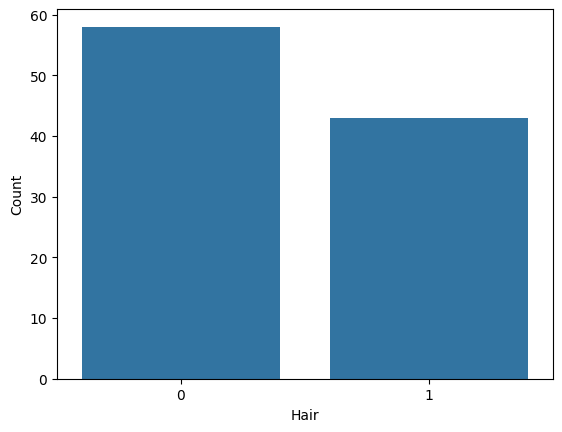

0    58
1    43
Name: hair, dtype: int64

In [26]:
sns.countplot(x="hair", data=data)
plt.xlabel("Hair")
plt.ylabel("Count")
plt.show()
data.loc[:,'hair'].value_counts()

[]

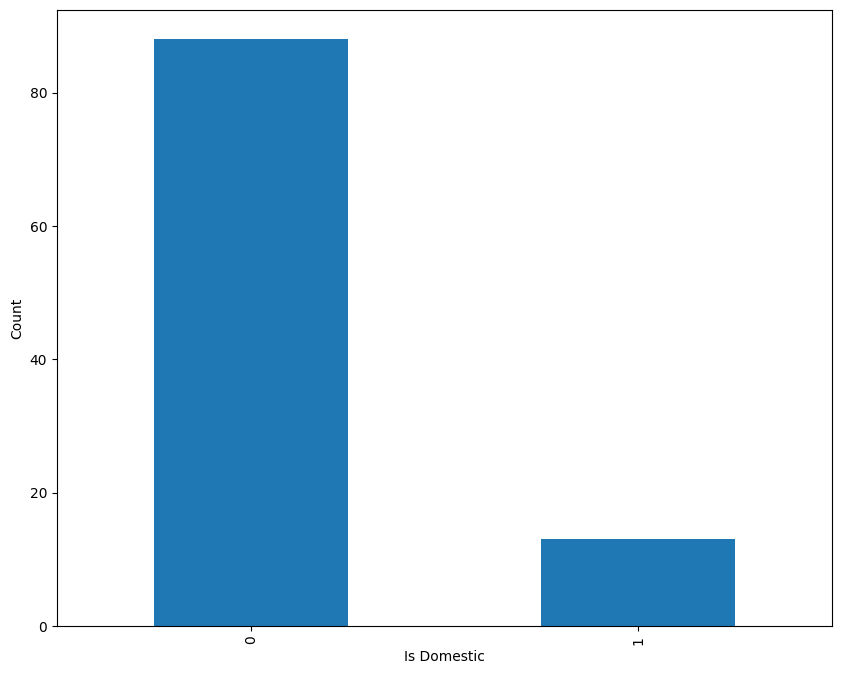

In [27]:
# Lets plot how many animals are domestic or not
plt.figure(figsize=(10,8));
data['domestic'].value_counts().plot(kind="bar");
plt.xlabel('Is Domestic');
plt.ylabel("Count");
plt.plot()

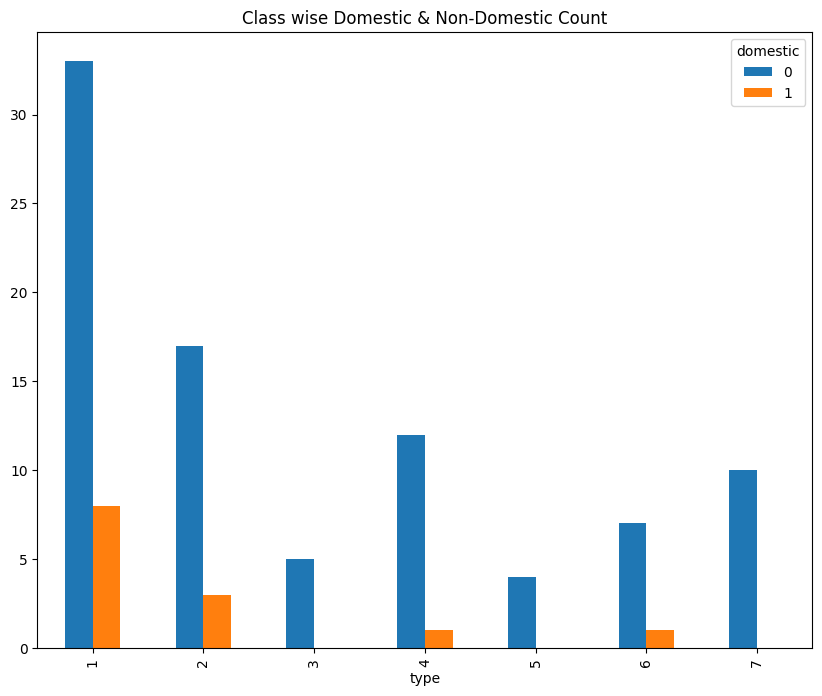

In [28]:
# Lets see species wise domestic and non-domestic animals
pd.crosstab(data['type'], data['domestic']).plot(kind="bar", figsize=(10, 8), title="Class wise Domestic & Non-Domestic Count");
plt.plot();

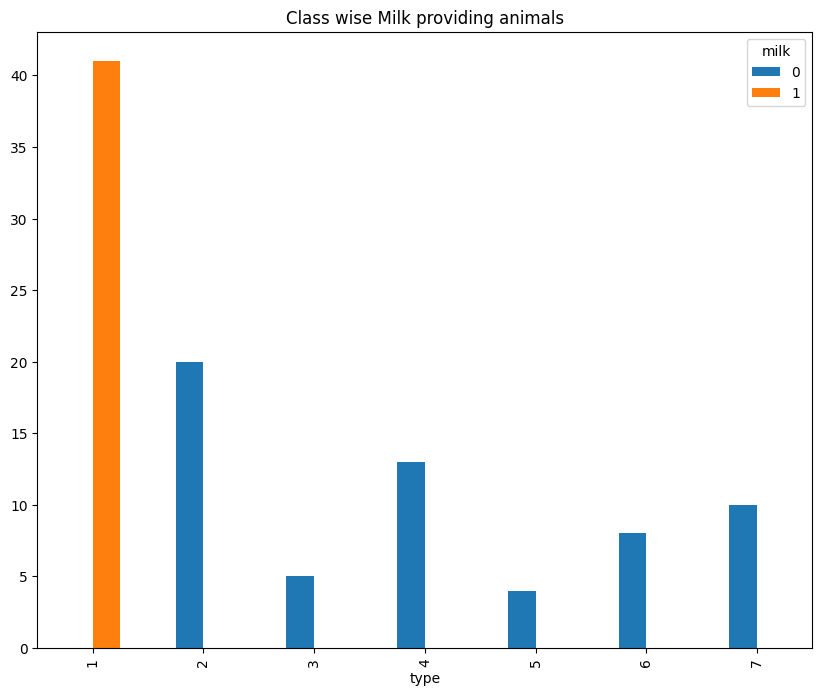

In [29]:
pd.crosstab(data['type'], data['milk']).plot(kind="bar", figsize=(10, 8), title="Class wise Milk providing animals");
plt.plot();

In [ ]:
target=data['type']
target

0     1
1     1
2     4
4     1
6     1
7     4
9     1
11    2
13    7
14    7
15    7
16    2
18    4
19    1
21    2
23    2
24    6
25    5
26    5
27    1
29    1
30    6
32    1
33    2
34    4
35    1
36    1
39    6
40    6
41    2
42    6
43    2
48    1
49    1
52    5
53    7
56    2
58    2
62    3
63    1
68    1
71    2
72    7
74    1
75    1
76    3
77    7
80    3
81    7
84    1
85    7
86    4
87    2
89    5
90    3
91    3
95    2
96    1
97    6
Name: type, dtype: int64

In [ ]:
data=data.drop_duplicates()
data

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,...,tail,domestic,catsize,type,legs_0,legs_2,legs_4,legs_5,legs_6,legs_8
0,1,0,0,1,0,0,1,1,1,1,...,0,0,1,1,0,0,1,0,0,0
1,1,0,0,1,0,0,0,1,1,1,...,1,0,1,1,0,0,1,0,0,0
2,0,0,1,0,0,1,1,1,1,0,...,1,0,0,4,1,0,0,0,0,0
4,1,0,0,1,0,0,1,1,1,1,...,1,0,1,1,0,0,1,0,0,0
6,1,0,0,1,0,0,0,1,1,1,...,1,1,1,1,0,0,1,0,0,0
7,0,0,1,0,0,1,0,1,1,0,...,1,1,0,4,1,0,0,0,0,0
9,1,0,0,1,0,0,0,1,1,1,...,0,1,0,1,0,0,1,0,0,0
11,0,1,1,0,1,0,0,0,1,1,...,1,1,0,2,0,1,0,0,0,0
13,0,0,1,0,0,0,1,0,0,0,...,0,0,0,7,1,0,0,0,0,0
14,0,0,1,0,0,1,1,0,0,0,...,0,0,0,7,0,0,1,0,0,0


In [ ]:
features=data.drop(['type'],axis=1)

In [ ]:
features

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,...,fins,tail,domestic,catsize,legs_0,legs_2,legs_4,legs_5,legs_6,legs_8
0,1,0,0,1,0,0,1,1,1,1,...,0,0,0,1,0,0,1,0,0,0
1,1,0,0,1,0,0,0,1,1,1,...,0,1,0,1,0,0,1,0,0,0
2,0,0,1,0,0,1,1,1,1,0,...,1,1,0,0,1,0,0,0,0,0
4,1,0,0,1,0,0,1,1,1,1,...,0,1,0,1,0,0,1,0,0,0
6,1,0,0,1,0,0,0,1,1,1,...,0,1,1,1,0,0,1,0,0,0
7,0,0,1,0,0,1,0,1,1,0,...,1,1,1,0,1,0,0,0,0,0
9,1,0,0,1,0,0,0,1,1,1,...,0,0,1,0,0,0,1,0,0,0
11,0,1,1,0,1,0,0,0,1,1,...,0,1,1,0,0,1,0,0,0,0
13,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
14,0,0,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
# Split the data
from sklearn.model_selection import train_test_split,GridSearchCV

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.7,random_state=100)

In [ ]:
x_train.shape

(41, 21)

In [ ]:
x_test.shape

(18, 21)

In [ ]:
y_train.shape

(41,)

In [ ]:
y_test.shape

(18,)

In [ ]:
# Import Model
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn1=KNeighborsClassifier(n_neighbors=2)

In [ ]:
knn1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
y_pred=knn1.predict(x_test)

In [ ]:
y_pred

array([1, 1, 1, 4, 4, 4, 7, 6, 1, 1, 1, 3, 6, 2, 4, 2, 5, 1])

In [ ]:
accuracy_score(y_test,y_pred)

0.8888888888888888

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       0.50      1.00      0.67         1
           3       1.00      0.33      0.50         3
           4       0.75      1.00      0.86         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         1

    accuracy                           0.89        18
   macro avg       0.89      0.90      0.86        18
weighted avg       0.93      0.89      0.87        18



# Grid **Search**

In [ ]:
# Grid search

In [ ]:
values=range(1,10)

In [ ]:
params=dict(n_neighbors=values)

In [ ]:
params

{'n_neighbors': range(1, 10)}

In [ ]:
grid=GridSearchCV(knn1,params)

In [ ]:
grid.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=2),
             param_grid={'n_neighbors': range(1, 10)})

In [ ]:
grid.best_params_

{'n_neighbors': 1}

In [ ]:
conf=confusion_matrix(y_test,y_pred)

In [ ]:
conf

array([[7, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 3, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 0, 1]])

<Axes: >

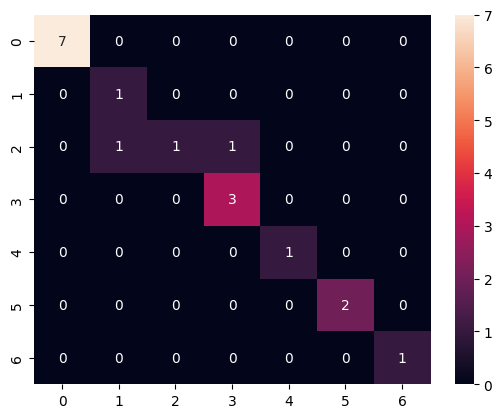

In [ ]:
sns.heatmap(conf,annot=True)